<a href="https://colab.research.google.com/github/rokmr/DIP/blob/main/SIFT_scale_space_extrema_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
# importing required library
import skimage.color
import skimage.io
import skimage.transform
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np

In [207]:
#  Forming gaussian kernal
def gaussian_kernel_2d(size, sigma):
    k = size // 2
    x, y = np.mgrid[-k:k + 1, -k:k + 1]  # forming matrix with (0,0) as center
    g = np.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))  # applying gauss at each location
    return g / g.sum()


def convolve(image, kernal):
    # Normalizing image
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    temp = signal.convolve2d(image, kernal, boundary='symm',
                             mode='same')  # same - The output is the same size as in1, centered with respect to the ‘full’ output.
    temp = (temp - np.min(temp)) / (np.max(temp) - np.min(temp)) * 255
    return temp


def DoG_Kernal(sigma_0: int, kernal_size: int, s: int):
    # DoG Kernal using gaussian kernal

    k = 2 ** (1 / (s - 1))  # k value for k * sima_0

    gauss_kernal = np.zeros((kernal_size, kernal_size, s))
    gauss_kernal[:, :, 0] = gaussian_kernel_2d(kernal_size, sigma_0)

    DoG_kernal = np.zeros((kernal_size, kernal_size, s - 1))
    for i in range(s - 1):
        gauss_kernal[:, :, i + 1] = gaussian_kernel_2d(kernal_size, k ** (i + 1) * sigma_0)
        DoG_kernal[:, :, i] = gauss_kernal[:, :, i + 1] - gauss_kernal[:, :, i]
    return DoG_kernal

In [208]:
def extrema_detection(image):
    DoG_kernal = DoG_Kernal(sigma_0, kernal_size, s)
    [m, n] = image.shape

    # Forming octave of DoG
    octave_of_DoG = np.zeros((m, n, s - 1))
    for i in range(s - 1):
        octave_of_DoG[:, :, i] = convolve(image, DoG_kernal[:, :, i])

    # extrema detection
    window_size = 3
    sift = np.zeros((m, n, s - 3))  # forming a blank image of input size
   
    for i in range(int(window_size // 2), m - int(window_size // 2)):     # starting and ending position(i) of window 
        for j in range(int(window_size // 2), n - int(window_size // 2)): # starting and ending position(j) of window 

            op_temp = octave_of_DoG[i - (window_size // 2):i + (window_size // 2) + 1,
                      j - (window_size // 2):j + (window_size // 2) + 1, :]

            for op in range(1, s - 2):
                if (max(op_temp[:, :, op - 1].max(), op_temp[:, :, op].max(), op_temp[:, :, op + 1].max()) == op_temp[
                    1, 1, op]) or (
                        min(op_temp[:, :, op - 1].min(), op_temp[:, :, op].min(), op_temp[:, :, op + 1].min()) ==
                        op_temp[
                            1, 1, op]):
                    sift[i - int(window_size // 2), j - int(window_size // 2), op - 1] = 255

    return np.any(sift,axis = 2)


In [241]:
def plotter(im1, im2, title:str):
  Fig_ip, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,9), dpi=100)
  Fig_ip.suptitle(title,fontsize=18)
  ax[0].imshow(im1, 
               cmap='gray'
               )
  ax[0].axis('off')
  ax[1].imshow(im2,
               cmap='gray'
               )
  ax[1].axis('off')

  Fig_ip.savefig('title',bbox_inches='tight')

In [255]:
def plotter(im1, im2, title:str):
  fig1 = plt.figure(figsize=(9,9), dpi = 150)
  plt.imshow(im1,cmap='gray')
  plt.title(f"book - {title}")
  plt.axis('off')
  fig1.savefig(f"books - {title}",bbox_inches='tight')

  fig2 = plt.figure(figsize=(9,9), dpi = 150)
  plt.imshow(im2,cmap='gray')
  plt.title(f"building - {title}")
  plt.axis('off')
  fig2.savefig(f"building - {title}",bbox_inches='tight')
  # Fig_ip, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,9), dpi=100)
  # Fig_ip.suptitle(title,fontsize=18)
  # ax[0].imshow(im1, 
  #              cmap='gray'
  #              )
  # ax[0].axis('off')
  # ax[1].imshow(im2,
  #              cmap='gray'
  #              )
  # ax[1].axis('off')

  # Fig_ip.savefig('title',bbox_inches='tight')

# Initaialization

In [210]:
# Hyper Parameter
sigma_0 = 1.1  # initial sigma
kernal_size = 5  # kernal size for gaussian
s = 8  # gaussian scale space
up_scale = 2
down_scale = 0.5

In [211]:
# Part A
# importing input image
image_path1 = '/content/books.png'
img1 = skimage.io.imread(image_path1)
image1 = skimage.color.rgb2gray(img1)
image_path2 = '/content/building.png'
img2 = skimage.io.imread(image_path2)
image2 = skimage.color.rgb2gray(img2)

<ipython-input-211-f889392fe19a>:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image1 = skimage.color.rgb2gray(img1)
<ipython-input-211-f889392fe19a>:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image2 = skimage.color.rgb2gray(img2)


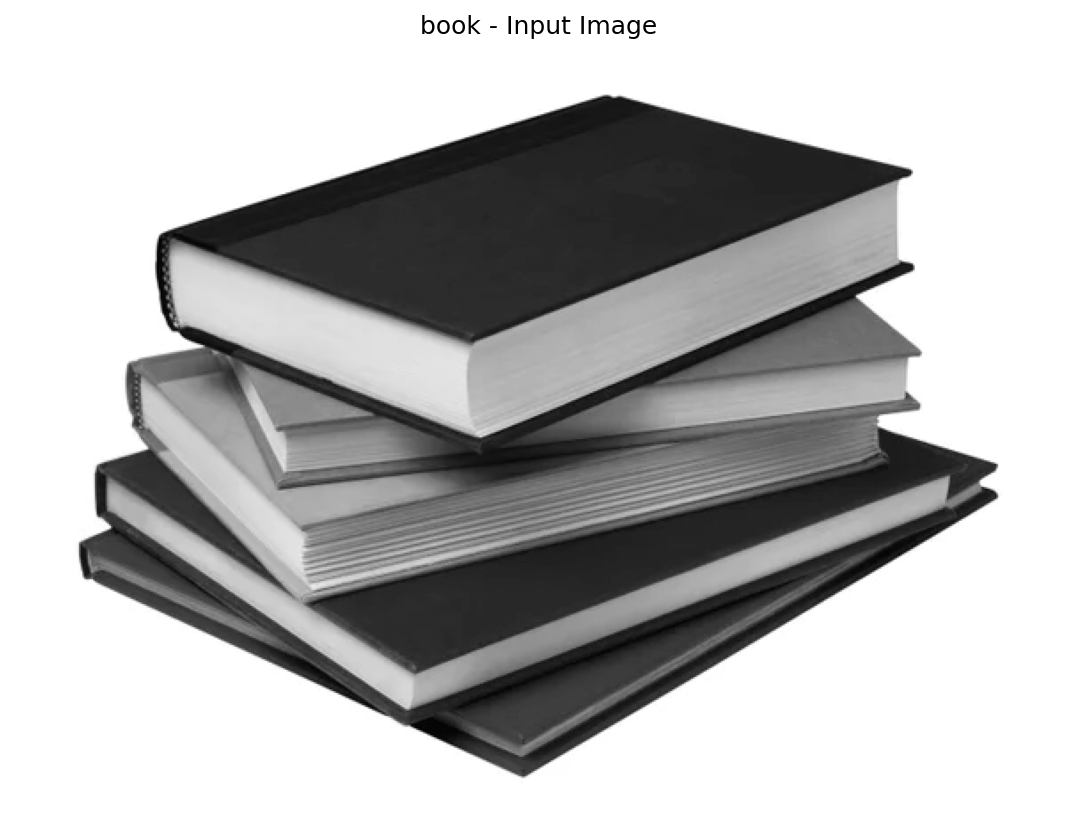

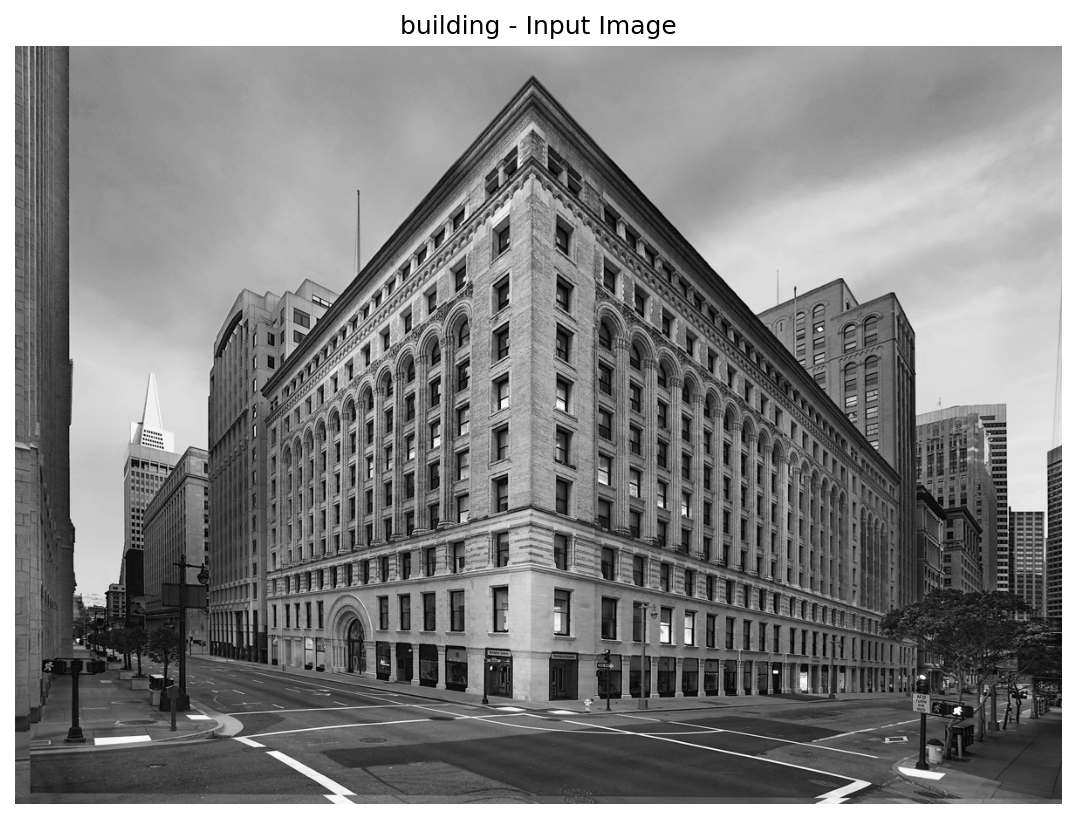

In [256]:
plotter(image1, image2, "Input Image")

# PART 1

In [ ]:
# SIFT on input image
ip1 = extrema_detection(image1)
ip2 = extrema_detection(image2)


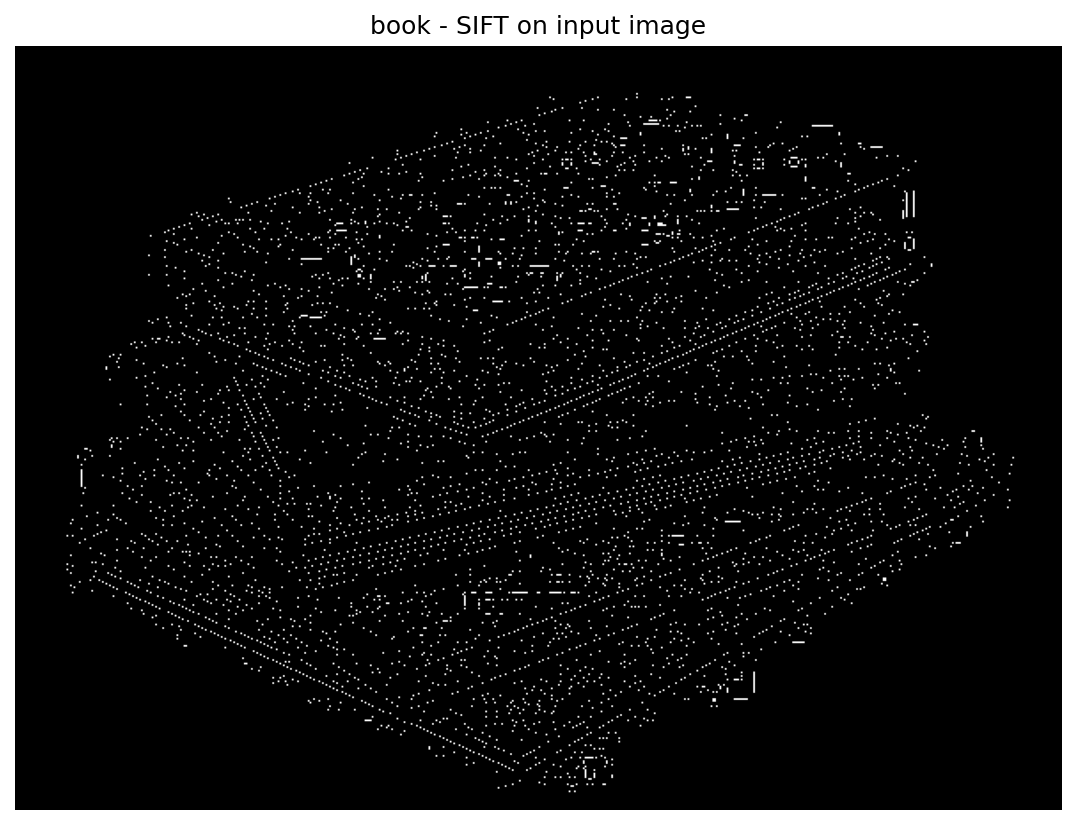

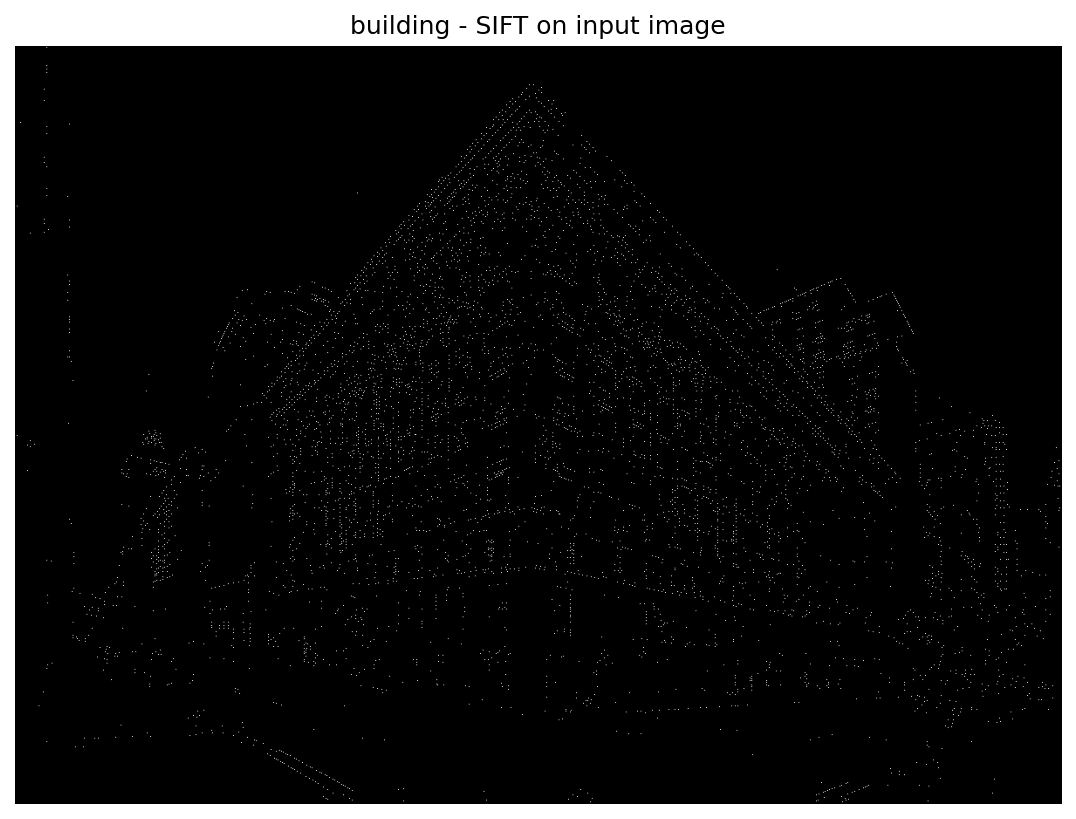

In [262]:
plotter(ip1, ip2, "SIFT on input image")

# PART B

(a)Rotation (b)Upscale (c)Downscale (d)Gaussian blur (e)Add Gaussian

##(a)Rotation

In [218]:
image1_r = skimage.transform.rotate(image1, 30, resize=True)
image2_r = skimage.transform.rotate(image2, 30, resize=True)

In [219]:
ip1_r = extrema_detection(image1_r)
ip2_r = extrema_detection(image2_r)

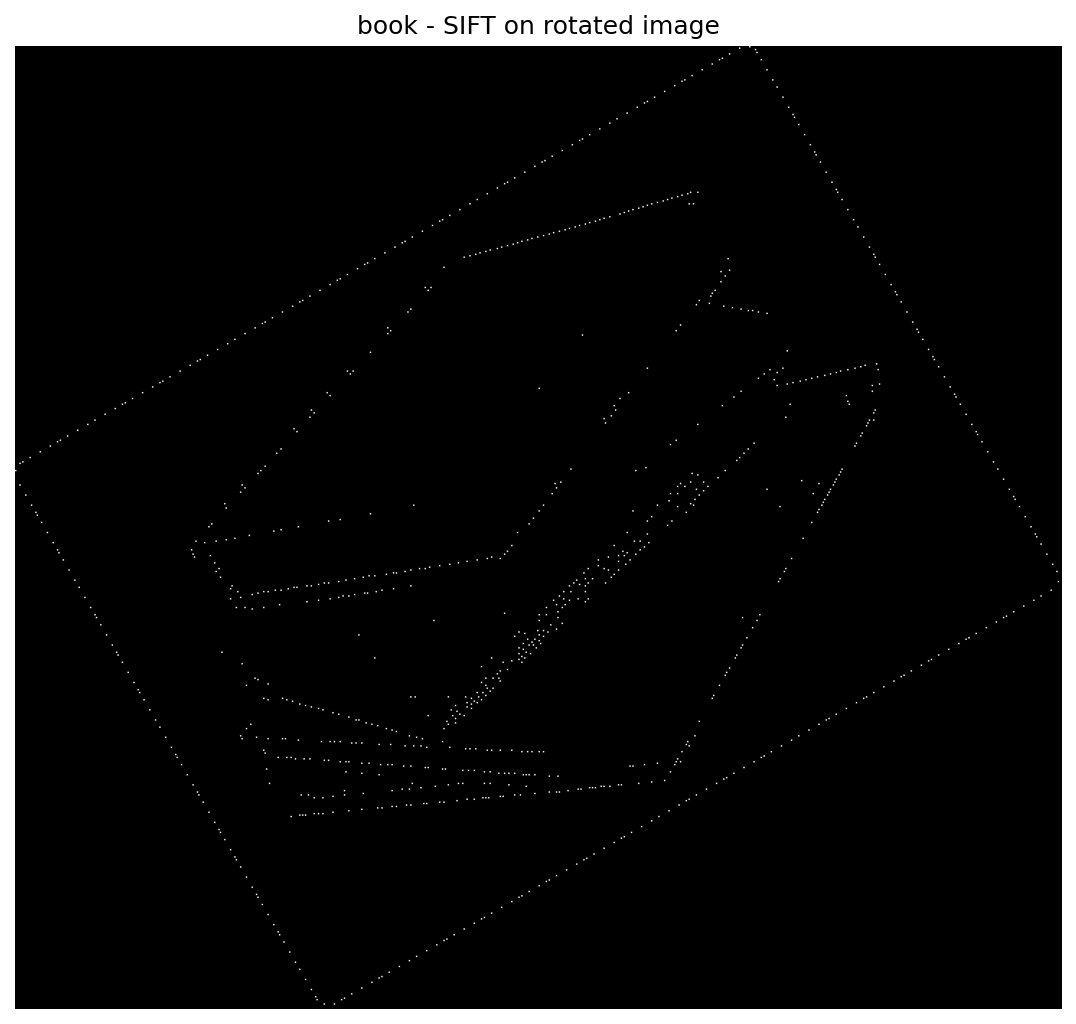

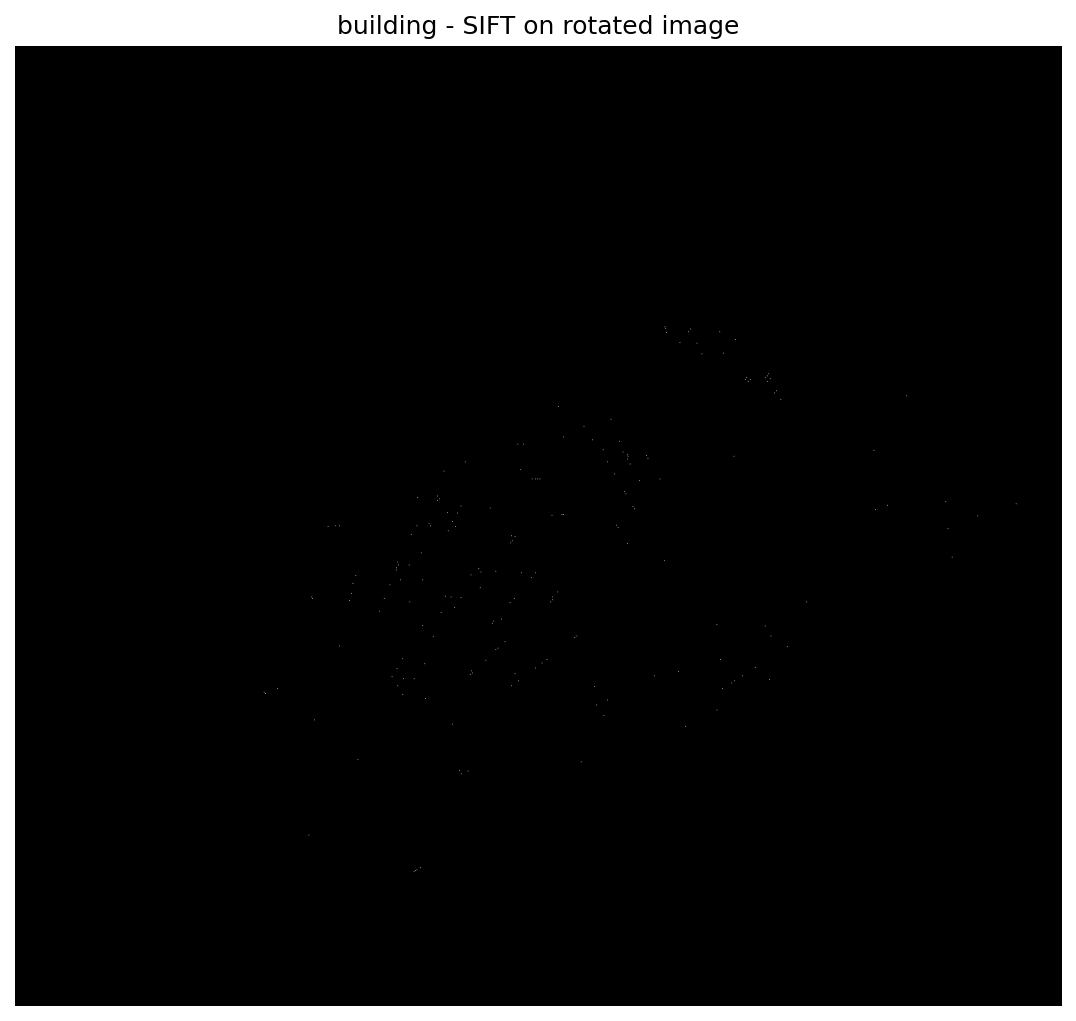

In [263]:
plotter(ip1_r, ip2_r, "SIFT on rotated image")

##(b) Upscale

In [221]:
image1_u = skimage.transform.rescale(image1, up_scale)
image2_u = skimage.transform.rescale(image2, up_scale)
ip1_u = extrema_detection(image1_u)
ip2_u = extrema_detection(image2_u)


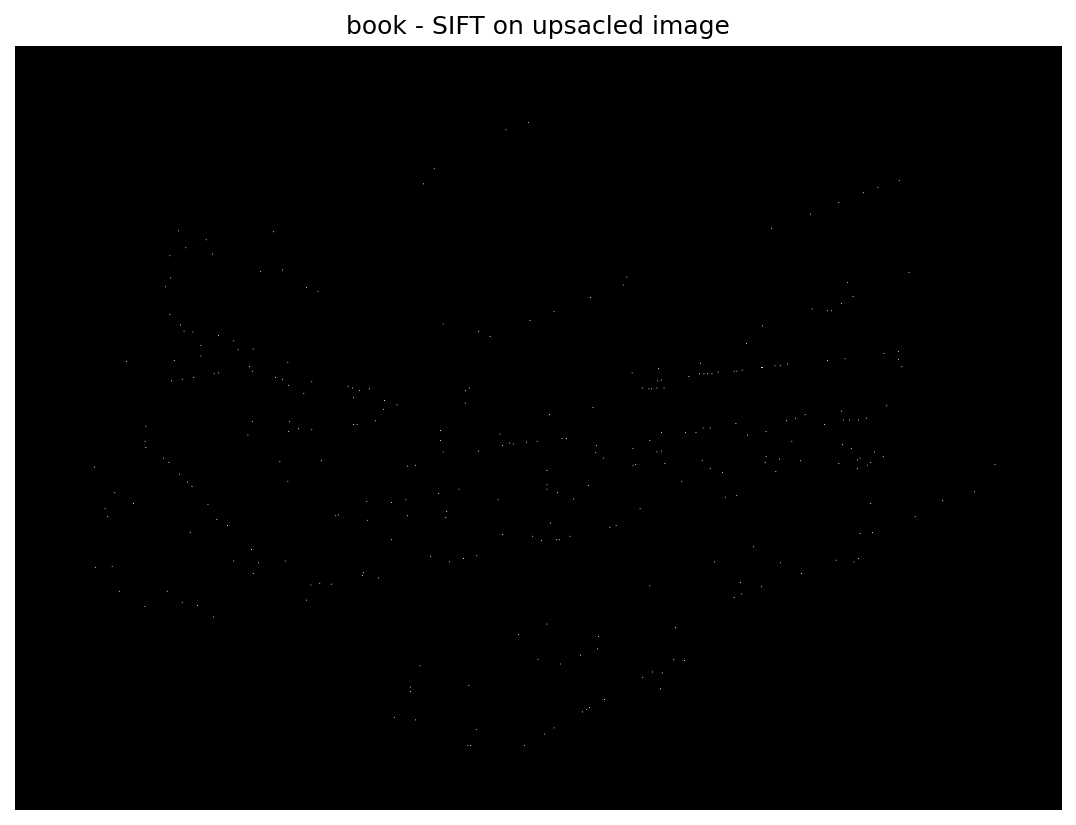

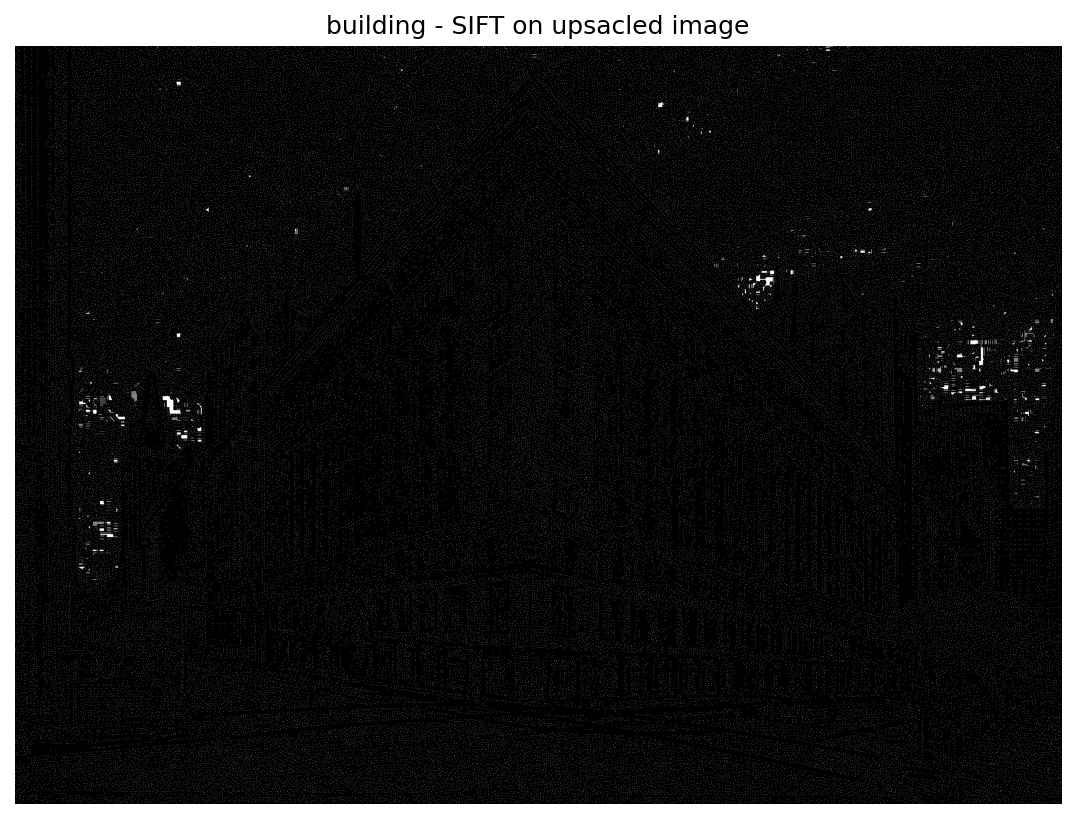

In [258]:
plotter(ip1_u, ip2_u, "SIFT on upsacled image")

##(c) Down Scale

In [226]:
image1_d = skimage.transform.rescale(image1, down_scale)
image2_d = skimage.transform.rescale(image2, down_scale)
ip1_d = extrema_detection(image1_d)
ip2_d = extrema_detection(image2_d)

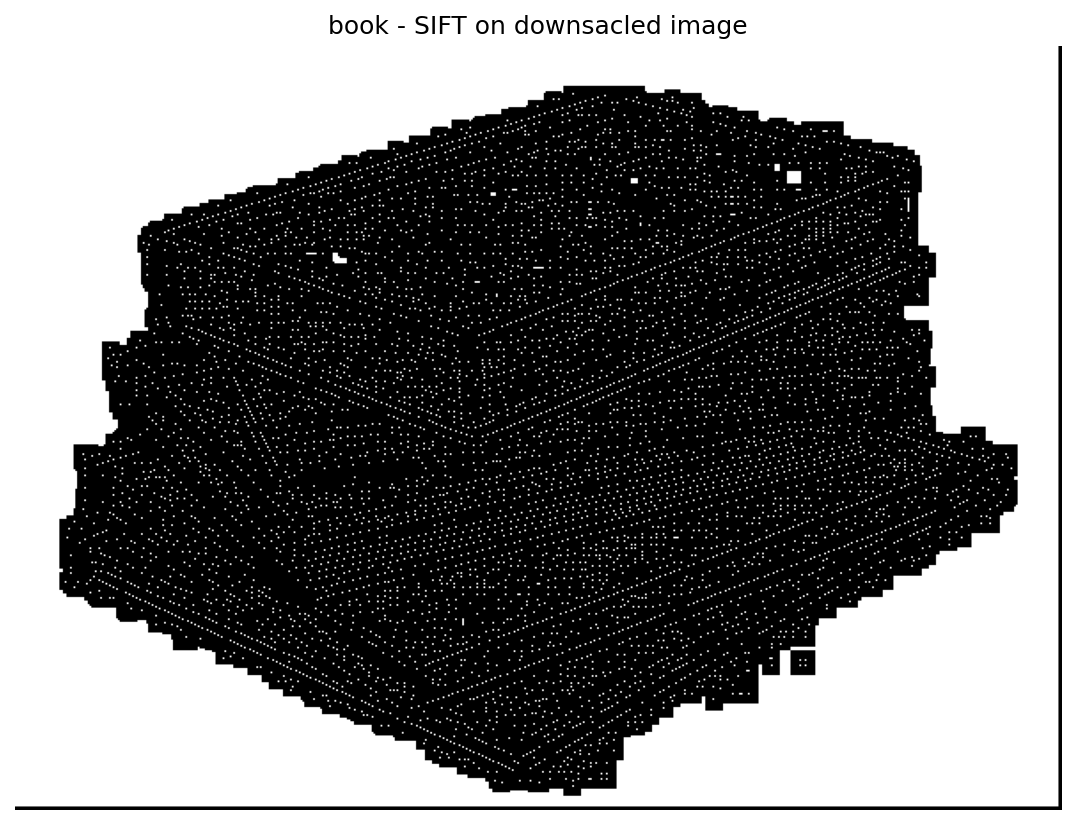

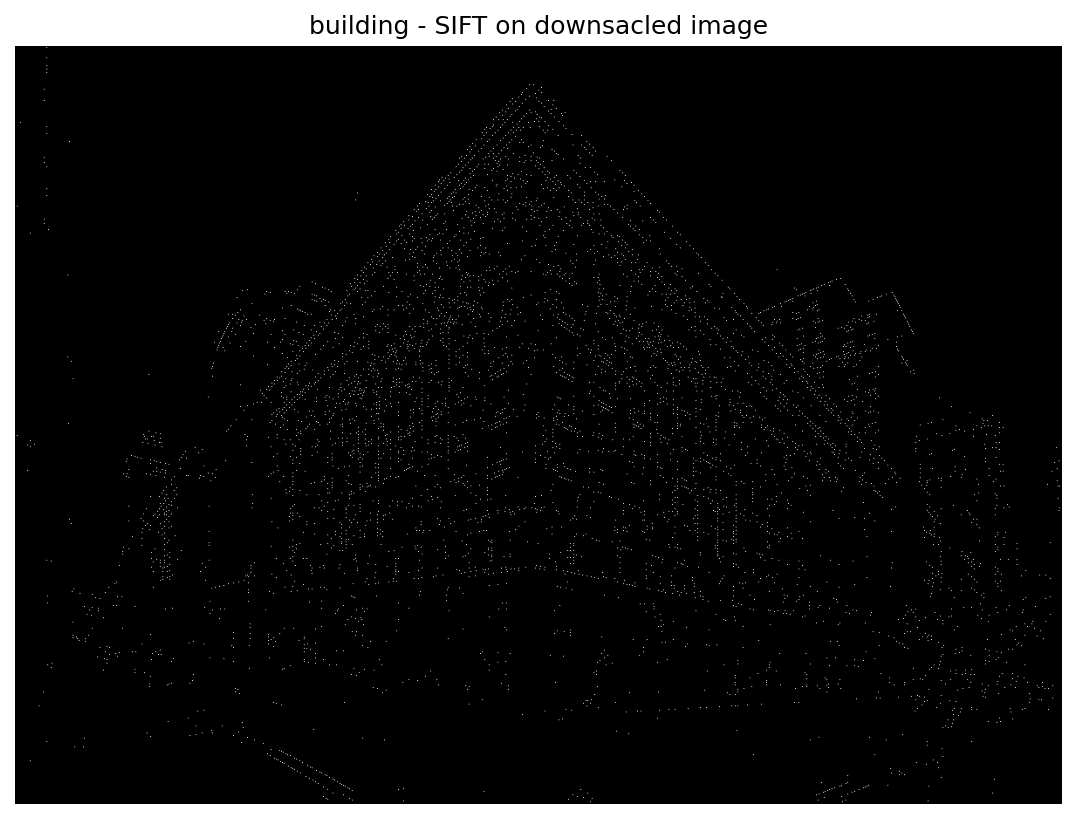

In [259]:
plotter(ip1_d, ip2_d, "SIFT on downsacled image")

##(d) Gaussian Blur

In [231]:
import skimage.filters
image1_gb = skimage.filters.gaussian(image1, sigma =0.4)
image2_gb = skimage.filters.gaussian(image2, sigma =0.4)
ip1_gb = extrema_detection(image1_gb)
ip2_gb= extrema_detection(image2_gb)

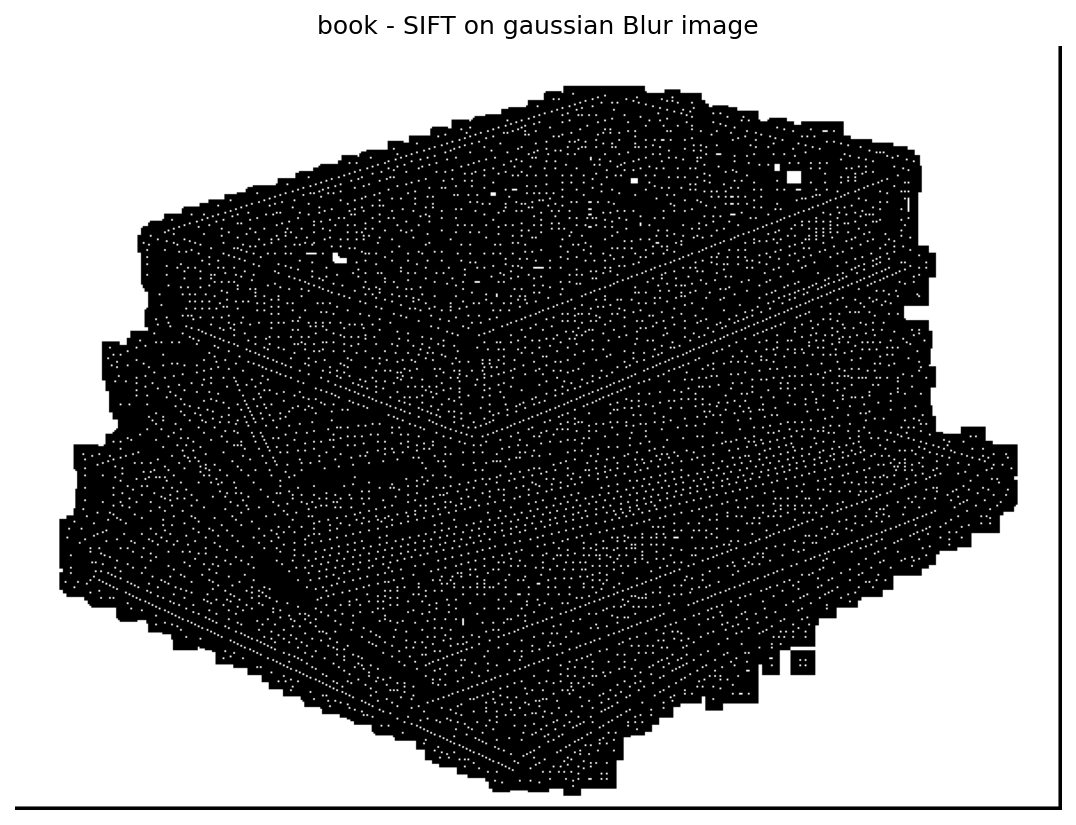

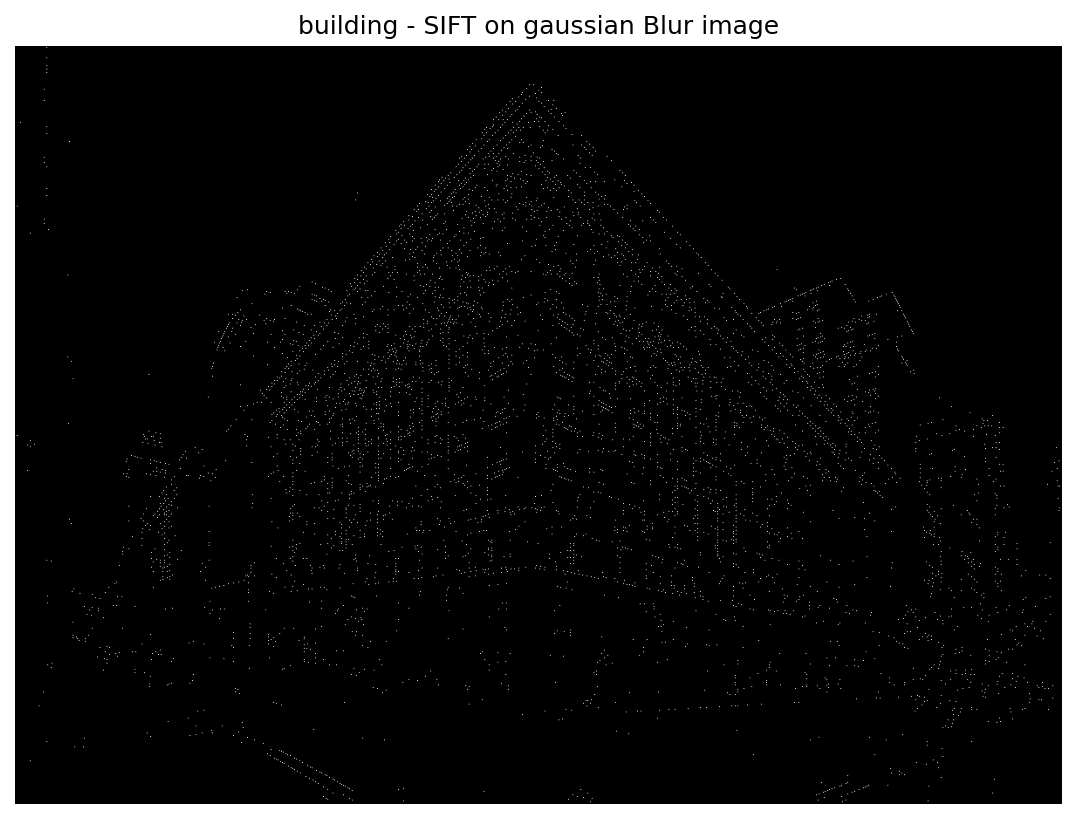

In [264]:
plotter(ip1_gb, ip2_gb, "SIFT on gaussian Blur image")

##(e) Gaussian Noise

In [233]:
import skimage.util
image1_gn = skimage.util.random_noise(image1, mode='gaussian')
image2_gn = skimage.util.random_noise(image2, mode='gaussian')
ip1_gn = extrema_detection(image1_gn)
ip2_gn= extrema_detection(image2_gn)

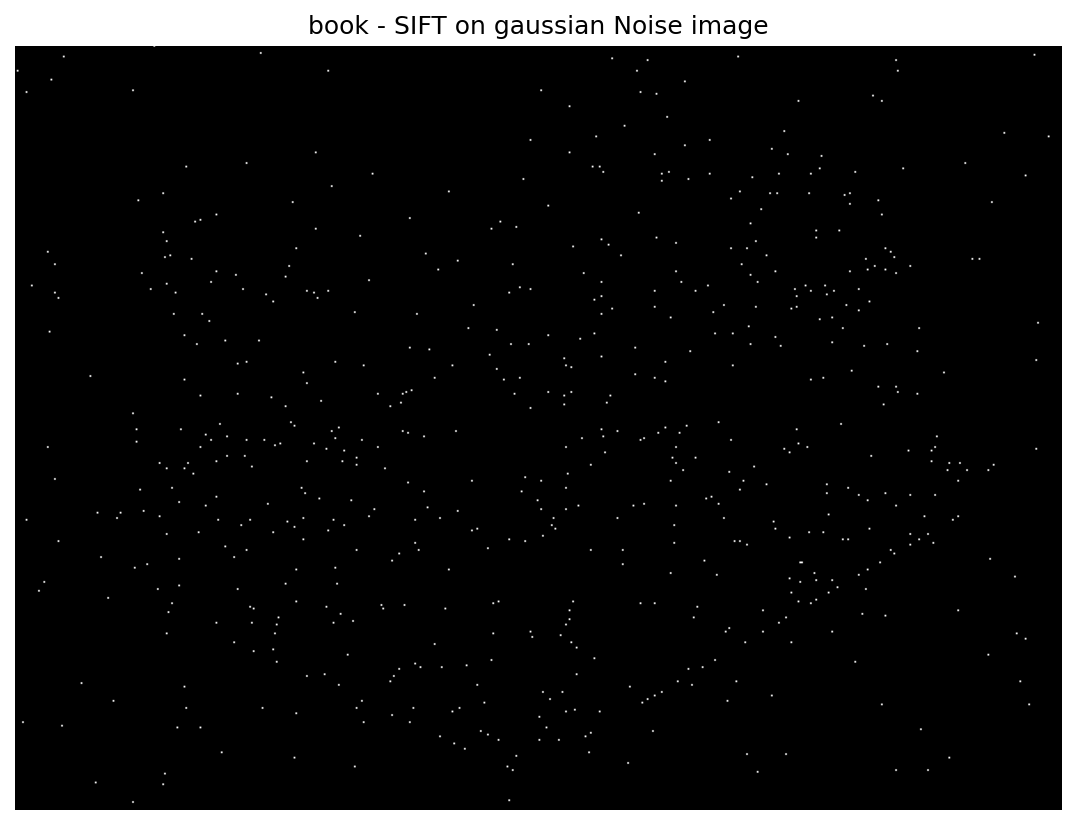

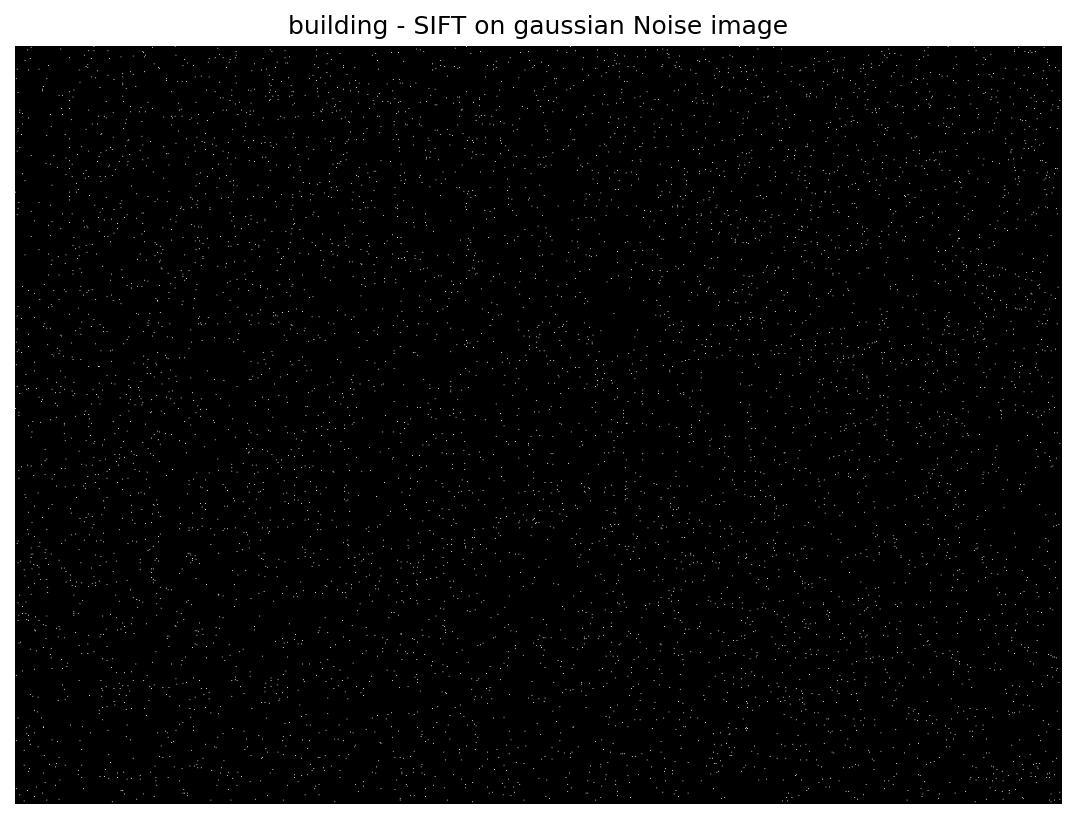

In [261]:
plotter(ip1_gn, ip2_gn, "SIFT on gaussian Noise image")